In [1]:
%%javascript
require(["codemirror/keymap/sublime", "notebook/js/cell", "base/js/namespace"],
    function(sublime_keymap, cell, IPython) {
        cell.Cell.options_default.cm_config.keyMap = 'sublime';
        var cells = IPython.notebook.get_cells();
        for(var cl=0; cl< cells.length ; cl++){
            cells[cl].code_mirror.setOption('keyMap', 'sublime');
        }
    }
);

<IPython.core.display.Javascript object>

In [2]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import warnings
warnings.filterwarnings('ignore')
# import all relevant func and modules from a companion .py file
from supp_lib import *

In [4]:
# it's nice sometimes to exclude sex chromosomes and mito for analysis
autosomal_chroms = ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',
 'chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17',
 'chr18','chr19','chr20','chr21','chr22']

### Figure 2 is based on several important BED-files ...

In [140]:
# recentered lists to try to mitigate some stackup artifact ...
# ! scp ghpcc:/nl/umw_job_dekker/users/av90w/ChIPseq/ChIP4/deeptools/G4/mao/recenter/intersect-all-NT-CTCF-NO-G4-centered ./
# ! scp ghpcc:/nl/umw_job_dekker/users/av90w/ChIPseq/ChIP4/deeptools/G4/mao/recenter/intersect-all-NT-CTCF-G4-centered ./
# ! scp ghpcc:/nl/umw_job_dekker/users/av90w/ChIPseq/ChIP4/deeptools/G4/mao/recenter/intersect-G4-NO-CTCF-centered ./

# ! scp ghpcc:/nl/umw_job_dekker/users/av90w/ChIPseq/ChIP4/deeptools/G4/mao/intersect-all-NT-CTCF-NO-G4 ./
# ! scp ghpcc:/nl/umw_job_dekker/users/av90w/ChIPseq/ChIP4/deeptools/G4/mao/intersect-all-NT-CTCF-G4 ./
# ! scp ghpcc:/nl/umw_job_dekker/users/av90w/ChIPseq/ChIP4/deeptools/G4/mao/intersect-G4-NO-CTCF ./
# !ls intersect-all-NT-CTCF-NO-G4
# !ls intersect-all-NT-CTCF-G4
# !ls intersect-G4-NO-CTCF

In [141]:
# # assortment of relevant BED files with the features of interest ...
# # bounds = "merged_bounds.bed"
# # bounds = "rad21_merged.bed"
# bounds = "union_RAD21_CTCF.bed"
# # bounds = "NT-RAD21-narrowPeaks-sort-merge"
# # bounds = "IAA-RAD21-narrowPeaks-sort-merge"
# # bounds = "NT-CTCF-narrowPeaks-sort-merge-with-strength.bed"
# feature_of_interest = bounds

feat_names = OrderedDict()
feat_names["ctcf"] = "intersect-all-NT-CTCF-NO-G4-centered"
feat_names["ctcf_g4"] = "intersect-all-NT-CTCF-G4-centered"
feat_names["g4"] = "intersect-G4-NO-CTCF-centered"
feat_names["allg4"] = "G4-Mao-sort"

## Read `feature_of_interest` that we want to look at using stackups ...
### we can also generate some random locations from hg19 using `generate_random_bed` ...

In [142]:
# bf is short for bioframe here ...
dfs = OrderedDict()
for k in feat_names:
    dfs[k] = bf.read_table(
        feat_names[k],
        names=["chrom","start","end"],
        usecols=(0,1,2),
        index_col=None
    )
    dfs[k] = dfs[k].sort_values(["chrom","start"])
    dfs[k] = dfs[k][dfs[k]["chrom"].isin(autosomal_chroms)]
    dfs[k] = dfs[k].reset_index(drop=True)


### explore spacing and footprints of the features being explored ...

simply plot distributions of the spacings between adjacent features and their sizes `end - start`  as well ...


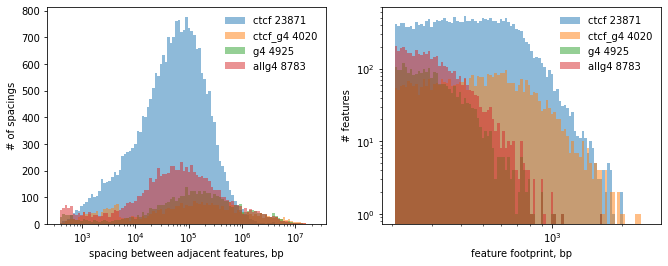

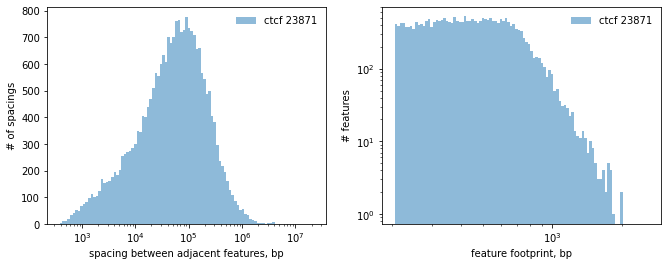

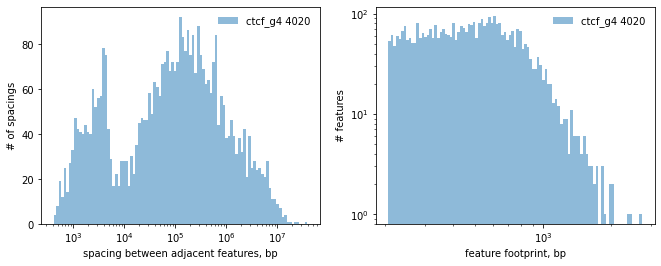

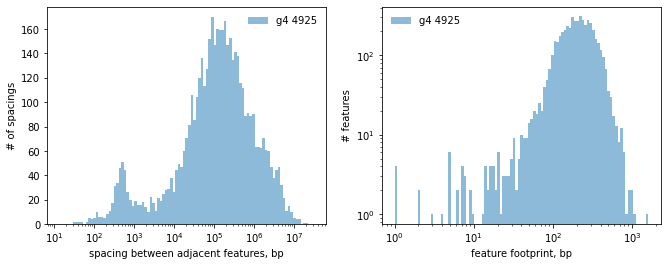

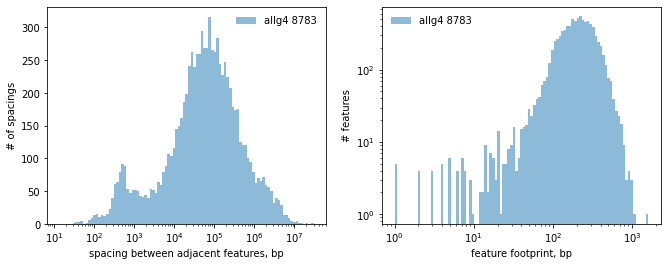

In [143]:
# just an overview of all of them together ...
plot_spacing_footprint_distros(dfs)
plot_spacing_footprint_distros({k:dfs[k] for k in ['ctcf']})
plot_spacing_footprint_distros({k:dfs[k] for k in ['ctcf_g4']})
plot_spacing_footprint_distros({k:dfs[k] for k in ['g4']})
plot_spacing_footprint_distros({k:dfs[k] for k in ['allg4']})

### in our analyses (insulation/compartments) we wouldn't resolve features that are too close ...
#### let's see what clustering those adjacent ones could do for us
#### let's try to pick a good clustering "radius" first - should be  around ~1-10kb ...

it's actually merging that we're doing - i.e. we don't need to know cluster information - just need to collapse nearby intervals into larger ones

to see how varying clustering radius affects the results see the gist : blah ...

### Not sure if we'd need to do it here, given the lare footprint of the G4 related peaks !!!...

In [144]:
# merge_radius = 500
# df_merged = bf.merge(df, min_dist=merge_radius)
# print(f"number of candidate features before and after merging: {len(df)} -> {len(df_merged)}")

### let's have the original CTCF and RAD21 peak calls here to do count them along our stackups as well...

In [145]:
# #################################################
# # DO WE NEED THIS HERE ?
# #####################################
# ctcf_df = bioframe.read_table(
#     "NT-CTCF-narrowPeaks-sort-merge",
#     names=["chrom","start","end"]
# )
# ctcf_df = ctcf_df.sort_values(["chrom","start"])
# ctcf_df = ctcf_df[ ctcf_df["chrom"].isin(autosomal_chroms) ]
# ctcf_df = ctcf_df.reset_index(drop=True)
# ctcf_df = bf.merge(ctcf_df, min_dist=merge_radius)

# rad21_df = bioframe.read_table(
#     "NT-RAD21-narrowPeaks-sort-merge",
#     names=["chrom","start","end"]
# )
# rad21_df = rad21_df.sort_values(["chrom","start"])
# rad21_df = rad21_df[ rad21_df["chrom"].isin(autosomal_chroms) ]
# rad21_df = rad21_df.reset_index(drop=True)
# rad21_df = bf.merge(rad21_df, min_dist=merge_radius)

# rad21_IAA_df = bioframe.read_table(
#     "IAA-RAD21-narrowPeaks-sort-merge",
#     names=["chrom","start","end"]
# )
# rad21_IAA_df = rad21_IAA_df.sort_values(["chrom","start"])
# rad21_IAA_df = rad21_IAA_df[ rad21_IAA_df["chrom"].isin(autosomal_chroms) ]
# rad21_IAA_df = rad21_IAA_df.reset_index(drop=True)
# rad21_IAA_df = bf.merge(rad21_IAA_df, min_dist=merge_radius)

In [278]:
# G4-seq : G4 stalled at polymerase, more comprehensive list (hg19):
# G4-seq data https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE63874
# ls ../GSE*bed.gz
# require tr -s '\t' - to remove duplicated tabs
# we've got + and - strand G4s separately ...
G4_minus_polstall = bioframe.read_table(
    "../GSE63874_Na_K_PDS_minus_hits_intersect.bed.gz",
    names=["chrom","start","end"],
    sep="\t",
    index_col = None
)
G4_plus_polstall = bioframe.read_table(
    "../GSE63874_Na_K_PDS_plus_hits_intersect.bed.gz",
    names=["chrom","start","end"],
    sep="\t",
    index_col = None
)
G4_plus_polstall = G4_plus_polstall.sort_values(["chrom","start"])
G4_plus_polstall = G4_plus_polstall[ G4_plus_polstall["chrom"].isin(autosomal_chroms) ]
G4_plus_polstall = G4_plus_polstall.reset_index(drop=True)
print(f"G4+ alone {len(G4_plus_polstall)} ...")

G4_minus_polstall = G4_minus_polstall.sort_values(["chrom","start"])
G4_minus_polstall = G4_minus_polstall[ G4_minus_polstall["chrom"].isin(autosomal_chroms) ]
G4_minus_polstall = G4_minus_polstall.reset_index(drop=True)
print(f"G4- alone {len(G4_minus_polstall)} ...")

G4_polstall = bf.merge(
    pd.concat([G4_plus_polstall,G4_minus_polstall]).reset_index(drop=True), # !!! Achtung !!! resetting_index is Yber important here!
#     min_dist=merge_radius
)
G4_polstall = G4_polstall.sort_values(["chrom","start"]).reset_index(drop=True)
print(f"G4-+ together {len(G4_polstall)}, would have been {len(G4_plus_polstall)+len(G4_minus_polstall)} ...")
G4_polstall.head()

G4+ alone 198824 ...
G4- alone 195394 ...
G4-+ together 378344, would have been 394218 ...


chrom  start    end  n_intervals
0  chr1   9999  10524            1
1  chr1  15058  15238            1
2  chr1  16680  16770            1
3  chr1  16785  16858            1
4  chr1  21143  21593            1

### after we explored how our features (intervals) are spaced and distributed
#### we can move on to the stackups - for different samples, different types of tracks, etc

In [208]:
# describe samples ....
samples = {}
# each sample would have several attributres related to stackups ... - fname, binsize, flank, datarange, colormap
samples["ctcf"] = {"fname": "NT-CTCF_R1.mLb.clN.bigWig",
                   "binsize":200,
                   "flank":5_000,
                   "crange":(0,2.2),
                   "cmap":cmap3,
                  }
samples["noctcf"] = {"fname":"IAA-CTCF_R1.mLb.clN.bigWig",
                   "binsize":200,
                   "flank":5_000,
                   "crange":(0,2.2),
                   "cmap":cmap3,
                  }
samples["rad21_CTCF"] = {"fname":"NT-RAD21_R1.mLb.clN.bigWig",
                   "binsize":200,
                   "flank":5_000,
                   "crange":(0,.4),
                   "cmap":cmap3,
                  }
samples["rad21_noCTCF"] = {"fname":"IAA-RAD21_R1.mLb.clN.bigWig",
                   "binsize":200,
                   "flank":5_000,
                   "crange":(0,.4),
                   "cmap":cmap3,
                  }
# best G4 track that we found ...
samples["G4a_r2"] = {"fname":"GSM2876095_B_REP2.SLX-12320.K562_P9_Async_a_701_517.rmdup.clean.bw",
                   "binsize":200,
                   "flank":5_000,
                   "crange":(0,30),
                   "cmap":cmap3,
                  }
# add ddx for fun ...
samples["ddx_CTCF"] = {"fname":"NT-DDX55_R1.mLb.clN.bigWig",
                   "binsize":200,
                   "flank":5_000,
                   "crange":(0,.4),
                   "cmap":cmap3,
                  }
samples["ddx_noCTCF"] = {"fname":"IAA-DDX55_R1.mLb.clN.bigWig",
                   "binsize":200,
                   "flank":5_000,
                   "crange":(0,.4),
                   "cmap":cmap3,
                  }
# add RNA-PolII
samples["polII"] = {"fname":"PolIIChipSeq-Hap1.bw",
                   "binsize":200,
                   "flank":5_000,
                   "crange":(0,.7),
                   "cmap":cmap3,
                  }

ins_binsize = 2_000
ins_diamond = 20_000
ins_binsize_human = f"{int(ins_binsize/1000)}kb"
ins_diamond_human = f"{int(ins_diamond/1000)}kb"
# deeper versions - combined for nice insulation stackups (todo - make sure CTCF and noCTCF - are at comparable depth)...
samples["ins_CTCF"] = {"fname":f"CkoCT442_NT_pool.hg19.{ins_binsize_human}.{ins_diamond_human}.bw",
                   "binsize":ins_binsize,
                   "flank":2*ins_diamond,
                   "crange":(-.5,.5),
                   "cmap":cmap2,
                  }
samples["ins_noCTCF"] = {"fname":f"CkoCT442_IAA_pool.hg19.{ins_binsize_human}.{ins_diamond_human}.bw",
                   "binsize":ins_binsize,
                   "flank":2*ins_diamond,
                   "crange":(-.5,.5),
                   "cmap":cmap2,
                  }


In [209]:
#let's describe our samples that we want to have in Figure 1 ...
fig2_samples = ["ctcf","noctcf","rad21_CTCF","rad21_noCTCF","ins_CTCF","ins_noCTCF","G4a_r2","polII"] #,"ddx_CTCF","ddx_noCTCF"]

titles = fig2_samples

bw_fnames = OrderedDict()
binsizes = {}
flanks = {}
limss = {}
cmps = {}
norms = {}
for s in fig2_samples:
    bw_fnames[s] = samples[s]["fname"]
    binsizes[s] = samples[s]["binsize"]
    flanks[s] = samples[s]["flank"]
    limss[s] = samples[s]["crange"]
    cmps[s] = samples[s]["cmap"]
    norms[s] = None

### next is computation heavy step - stackups using bbi ...

In [153]:
# do all stackups with the parameters ...
stackup_dict = OrderedDict()
for k in dfs:
    stackups = {}
    print(f"going to stackup features {k}:({len(dfs[k])}) ...\n\n")
    for s in bw_fnames:
        print(f"stacking up {s} ...")
        %time stackups[s] = rstacks( bw_fnames[s], dfs[k], flank=flanks[s], binsize=binsizes[s] )
    stackup_dict[k] = stackups

going to stackup features ctcf:(23871) ...


stacking up ctcf ...
CPU times: user 7.4 s, sys: 687 ms, total: 8.09 s
Wall time: 8.08 s
stacking up noctcf ...
CPU times: user 6.78 s, sys: 600 ms, total: 7.38 s
Wall time: 7.39 s
stacking up rad21_CTCF ...
CPU times: user 7.66 s, sys: 860 ms, total: 8.52 s
Wall time: 8.54 s
stacking up rad21_noCTCF ...
CPU times: user 5.98 s, sys: 492 ms, total: 6.47 s
Wall time: 6.45 s
stacking up ins_CTCF ...
CPU times: user 5.24 s, sys: 428 ms, total: 5.67 s
Wall time: 5.65 s
stacking up ins_noCTCF ...
CPU times: user 5.23 s, sys: 410 ms, total: 5.64 s
Wall time: 5.59 s
stacking up G4a_r2 ...
CPU times: user 9.25 s, sys: 657 ms, total: 9.91 s
Wall time: 9.97 s
stacking up polII ...
CPU times: user 5.85 s, sys: 459 ms, total: 6.3 s
Wall time: 6.26 s
going to stackup features ctcf_g4:(4020) ...


stacking up ctcf ...
CPU times: user 1.56 s, sys: 101 ms, total: 1.66 s
Wall time: 1.68 s
stacking up noctcf ...
CPU times: user 1.3 s, sys: 88.5 ms, total: 1.39

### Normalize insulation stackups - subtract some value from each row in the stackup ...

In [154]:
# normalize all of the insulation stackups for all of the features lists
insulation_keys = [_k for _k in bw_fnames.keys() if _k.startswith("ins")]

# subtract = "mean_top"
# subtract_size = 7
for feature_key in stackup_dict:
    normalize_insulation_stackups_INPLACE(
        stackups_set = stackup_dict[feature_key],
        ins_keys = insulation_keys
    )

In [210]:
# ADJUST COLOMAP FOR INSULATION AND ADJUST VMIN/VMAX FOR THE INSULATION AS WELL ....
# insulation
for s in insulation_keys:
    limss[s] = (-.452,-.153)
    cmps[s] = "YlGnBu_r"

In [156]:
# NOW REORDER A STACKUPS FOR EACH FEATURE ACCORDING TO SOMETHING ....
reordered_jdxs = OrderedDict()
for feature_key in stackup_dict:
    the_stackups = stackup_dict[feature_key]
    # for a given set of stackups for a given list of features ...
    length,width = the_stackups['ctcf'].shape
    center_bin = int(width/2)
    the_stackups['ctcf_mean'] = np.nanmean(the_stackups['ctcf'][:,center_bin-1:center_bin+1],axis=1)
    # the_stackups['rad21_mean'] = np.nanmean(the_stackups['rad21_CTCF'][:,center_bin-2:center_bin+2],axis=1)
    _, _jjj = recursive_data_ordering(
        ks = [('ctcf_mean', "sort", 1, False)],
        idxs = np.arange( len(the_stackups['ctcf_mean']) ),
        data_dict = the_stackups,
        verbose=True
    )
    reordered_jdxs[feature_key] = _jjj


sorting 23871 elements of ctcf_mean into 1 groups ...
sorting 4020 elements of ctcf_mean into 1 groups ...
sorting 4925 elements of ctcf_mean into 1 groups ...
sorting 8783 elements of ctcf_mean into 1 groups ...


### calculate running average (in chunks of 100) number of called peaks along the stackup

In [284]:
# #
# # skipping this for now ....
# #
from more_itertools import chunked
CHUNK_SIZE = 100

# index_chunks = chunked(df_merged.loc[jjj].index, CHUNK_SIZE)
# ctcf_peaks_sorted = []
# for ii in index_chunks:
#     _df1 = df_merged.loc[ii][["chrom","start","end"]].reset_index(drop=True)
#     _df2 = ctcf_df
#     ctcf_peaks_sorted.append(bioframe.count_overlaps(_df1, _df2 )["count"].sum())

    
# index_chunks = chunked(df_merged.loc[jjj].index, CHUNK_SIZE)
# rad21_peaks_sorted = []
# for ii in index_chunks:
#     _df1 = df_merged.loc[ii][["chrom","start","end"]].reset_index(drop=True)
#     _df2 = rad21_df
#     rad21_peaks_sorted.append(bioframe.count_overlaps(_df1, _df2 )["count"].sum())
    
# index_chunks = chunked(df_merged.loc[jjj].index, CHUNK_SIZE)
# rad21IAA_peaks_sorted = []
# for ii in index_chunks:
#     _df1 = df_merged.loc[ii][["chrom","start","end"]].reset_index(drop=True)
#     _df2 = rad21_IAA_df
#     rad21IAA_peaks_sorted.append(bioframe.count_overlaps(_df1, _df2 )["count"].sum())

G4_polstall_sorted = {}
Number_of_chunks = {}
for feature_key in ['ctcf', 'ctcf_g4', 'g4']:
    jjj = reordered_jdxs[feature_key]
    features_df = dfs[feature_key]
    # G4_polstall
    index_chunks = chunked(features_df.loc[jjj].index, CHUNK_SIZE)
    G4_polstall_sorted[feature_key] = []
    Number_of_chunks[feature_key] = 0
    _df2 = G4_polstall # works as is !!!
    for ii in index_chunks:
        _df1 = features_df.loc[ii][["chrom","start","end"]].reset_index(drop=True)
        G4_polstall_sorted[feature_key].append(bioframe.count_overlaps(_df1, _df2 )["count"].sum())
        Number_of_chunks[feature_key] += 1

#### plotting those running averages is integrated into `plot_stackups` function ...

In [285]:
##############################################
# now we'll be plotting stackups for different feature independently ...
#############################################
# stackup_dict.keys()
print('ctcf', 'ctcf_g4', 'g4')

ctcf ctcf_g4 g4


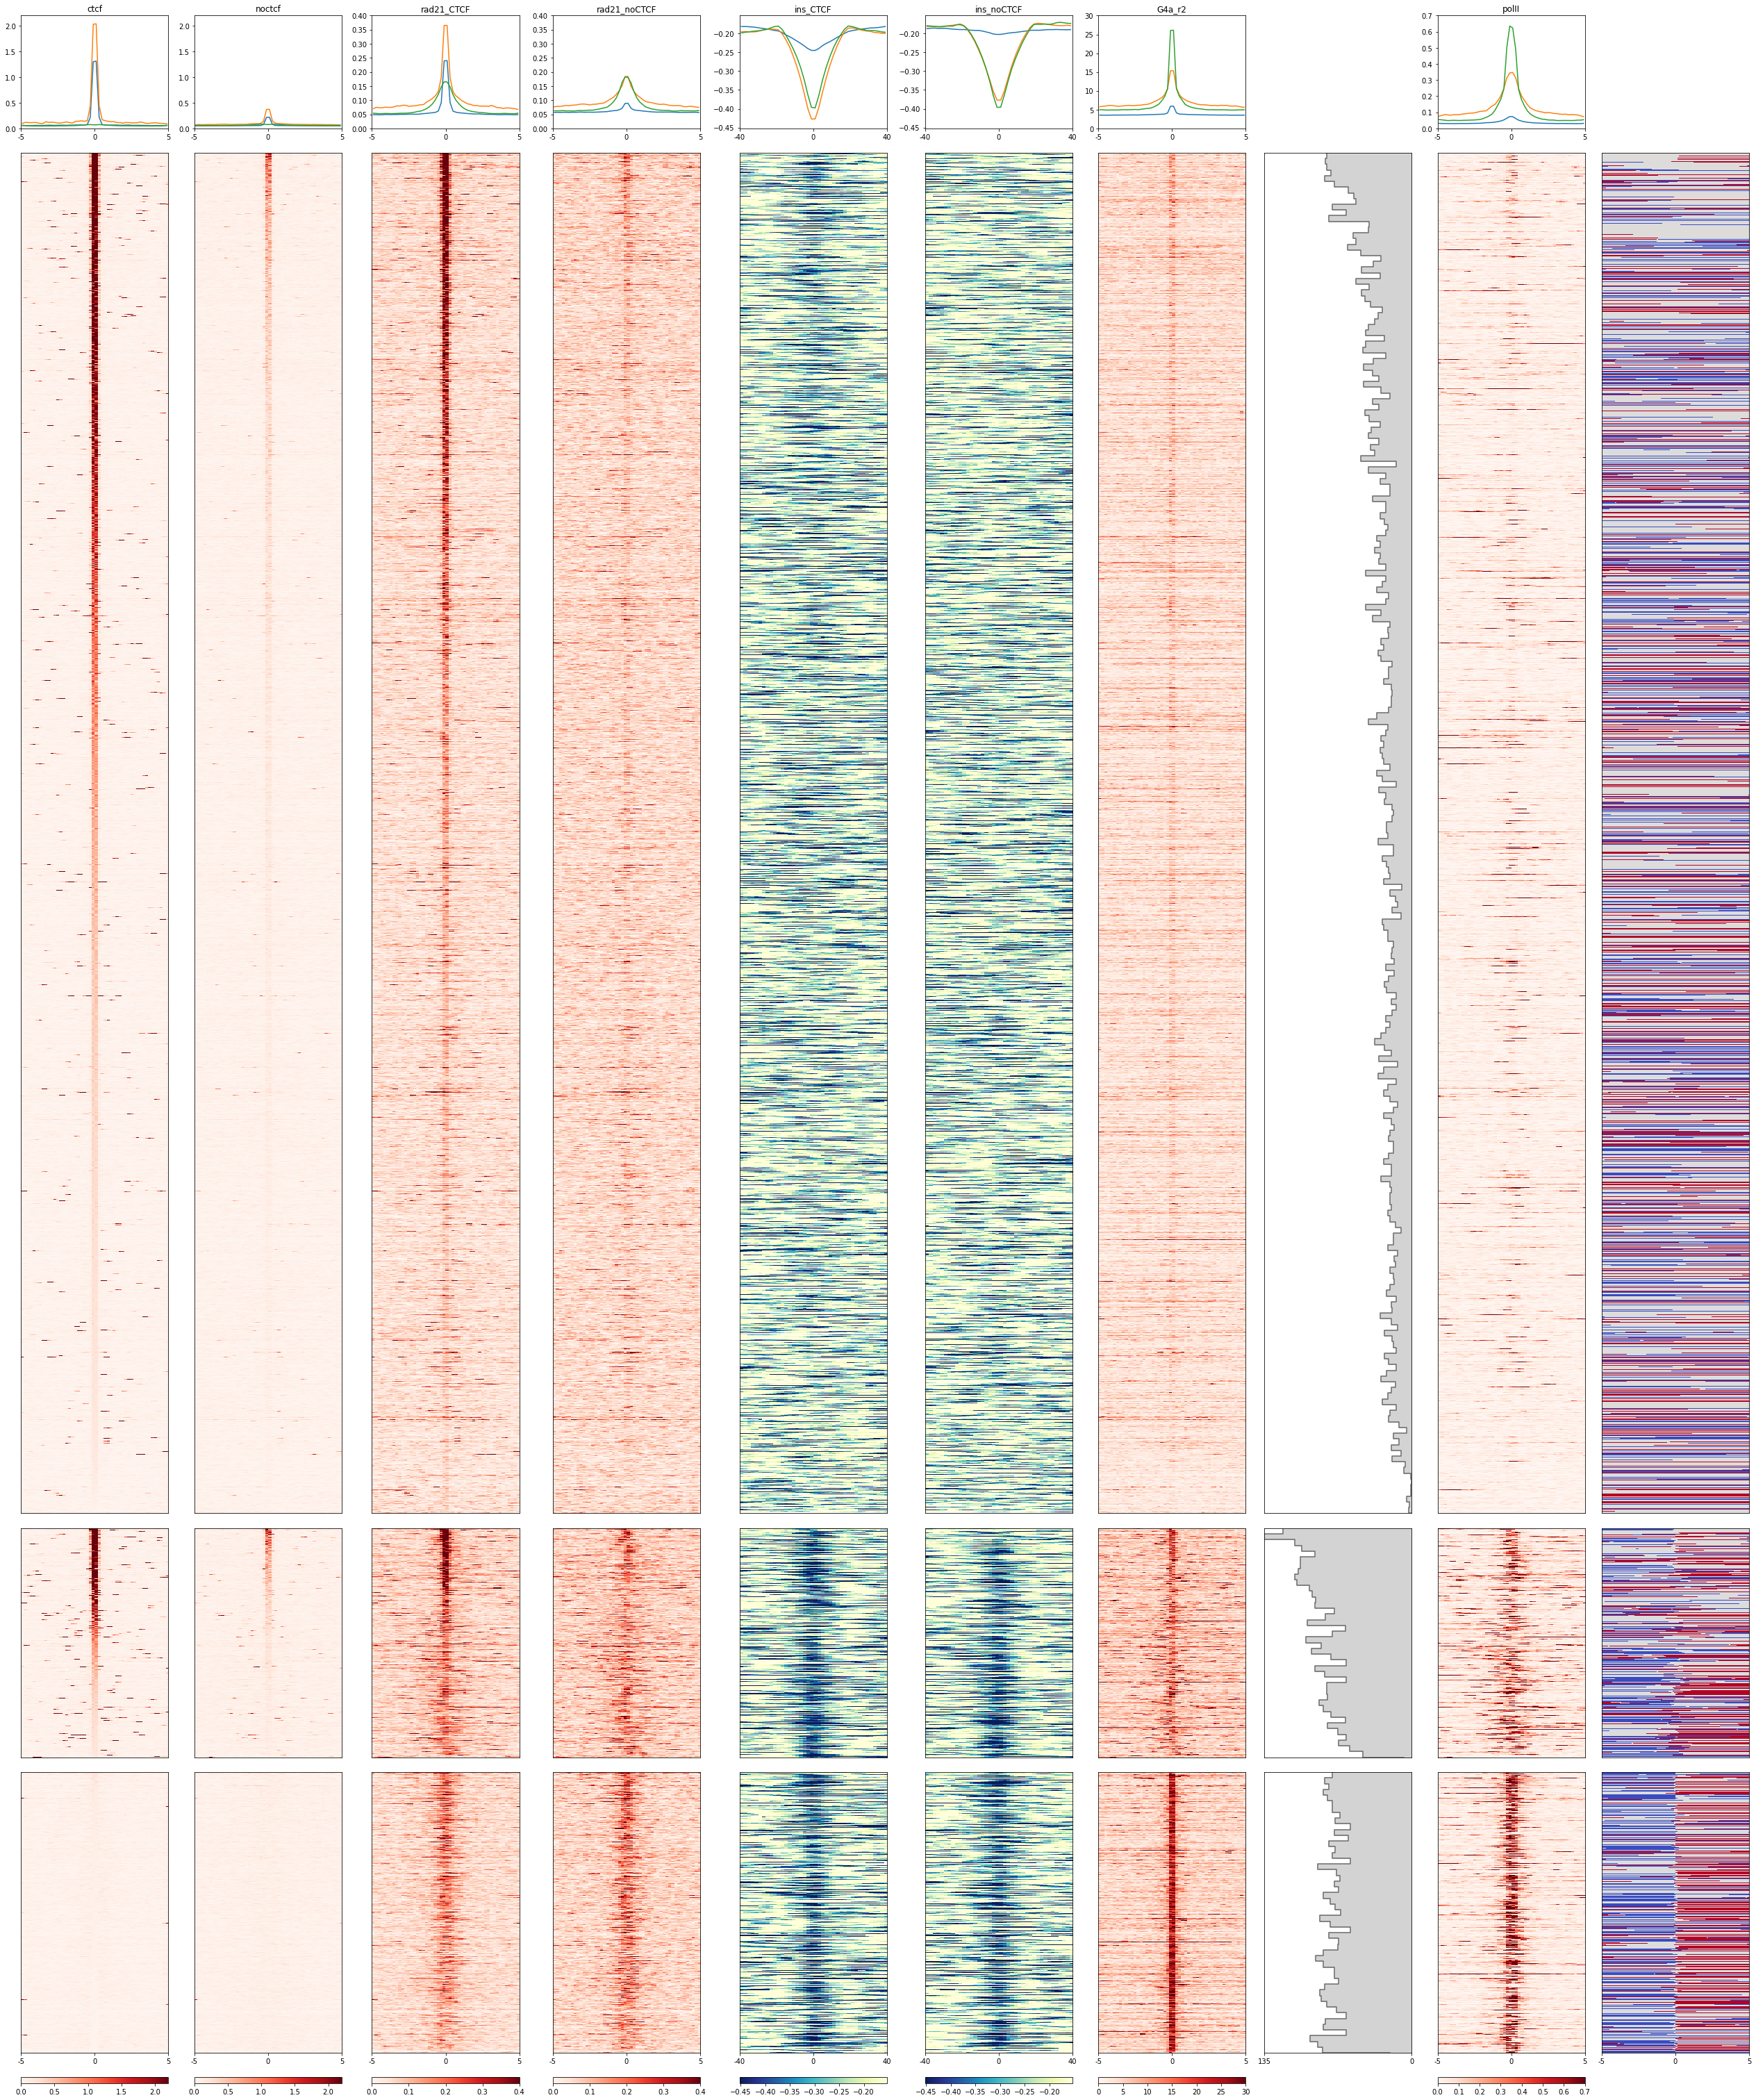

In [307]:
hmss = OrderedDict()

for feature_key in ['ctcf', 'ctcf_g4', 'g4']:
    jjj = reordered_jdxs[feature_key]
    _stackups = stackup_dict[feature_key]
    hmss[feature_key] = [ _stackups[_k][jjj] for _k in fig2_samples ]

_limss = [ limss[_k] for _k in fig2_samples ]
_cmps = [ cmps[_k] for _k in fig2_samples ]
_binsizes = [ binsizes[_k] for _k in fig2_samples ]
_norms = [ norms[_k] for _k in fig2_samples ]

# xtra_plots = [1,2]
extra_order = [7,9]
hmss_order = [0,1,2,3,4,5,6,8]
xtra_axs = plot_stackups_sets(extra_order,hmss,titles,_limss,_cmps,_norms,_binsizes,extra_order=extra_order,hmss_order=hmss_order,fillmissing=False,interpolation="nearest")
# xtra_axs - 2 dimensional list of axes, first index - "column"; second index is row - i.e. the stackup group

# DEAL WITH XTRA PLOTS MANUALLY - AFTERWARDS ...
#     for idx in range(len(extra_plots)):
y,width,color = Number_of_chunks, G4_polstall_sorted, "lightgrey"
common_width_max = max(max(width[k]) for k in width)
col_index = extra_order[0]
for i, feature_key in enumerate(['ctcf', 'ctcf_g4', 'g4']):
    _y = np.arange(y[feature_key])
    _width = width[feature_key]
    _color = color
    xtra_axs[col_index][i].step(_width,_y,color="dimgray")
    xtra_axs[col_index][i].fill_betweenx(_y,0,_width,color=_color,step="post")
    xtra_axs[col_index][i].invert_yaxis()
    xtra_axs[col_index][i].invert_xaxis()
    xtra_axs[col_index][i].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: f"{int(x*100)}"))
    xtra_axs[col_index][i].set_ylim(max(_y), 0)
    xtra_axs[col_index][i].set_xlim(common_width_max,0)
    xtra_axs[col_index][i].set_yticks([])
    xtra_axs[col_index][i].set_yticklabels([])   
    xtra_axs[col_index][i].set_xticks([])
    xtra_axs[col_index][i].set_xticklabels([])   
xtra_axs[col_index][i].set_xticks([common_width_max,0])
xtra_axs[col_index][i].set_xticklabels([common_width_max,0])


annot_flank = 5000
annot_binsize = 100
col_index = extra_order[1]
for i, feature_key in enumerate(['ctcf', 'ctcf_g4', 'g4']):
    jjj = reordered_jdxs[feature_key]
    feat_df = dfs[feature_key].loc[jjj]
    aaa = rstacks(
        "pcgene_plus.bb",
        feat_df,
        flank=annot_flank,
        binsize=annot_binsize,
    )
    bbb = rstacks(
        "pcgene_minus.bb",
        feat_df,
        flank=annot_flank,
        binsize=annot_binsize,
    )
    xtra_axs[col_index][i].imshow(aaa-bbb,aspect="auto",interpolation="nearest",cmap="coolwarm",vmin=-1,vmax=1)
    xtra_axs[col_index][i].set_xticks([])
    xtra_axs[col_index][i].set_xticklabels([])   
    xtra_axs[col_index][i].set_yticks([])
    xtra_axs[col_index][i].set_yticklabels([])
# ticks
stack_width = aaa.shape[1]
center_bin = stack_width/2 - .5
flank_in_kb = int((center_bin+.5)*annot_binsize/1000)
flank_ticks = [0-.5, center_bin, stack_width-.5]
flank_ticklabels = [-flank_in_kb,0,flank_in_kb]
xtra_axs[col_index][i].set_xticks(flank_ticks)
xtra_axs[col_index][i].set_xticklabels(flank_ticklabels)

plt.savefig("Fig2.pdf")

In [287]:
# ###############################################################################
# ####
# #### LEGACY STACKUP PLOTTING SEPARATE FOR THE GROUPS ...
# ####
# ###############################################################################
# feature_key = 'ctcf'
# jjj = reordered_jdxs[feature_key]
# _stackups = stackup_dict[feature_key]
# hmss = [ _stackups[_k][jjj] for _k in fig2_samples ]
# _limss = [ limss[_k] for _k in fig2_samples ]
# _cmps = [ cmps[_k] for _k in fig2_samples ]
# _binsizes = [ binsizes[_k] for _k in fig2_samples ]
# _norms = [ norms[_k] for _k in fig2_samples ]

# xtra_plots = None
# plot_stackups(xtra_plots,hmss,titles,_limss,_cmps,_norms,_binsizes,fname=f"Fig2_{feature_key}.pdf",fillmissing=False,interpolation="nearest")

# feature_key = 'ctcf_g4'
# jjj = reordered_jdxs[feature_key]
# _stackups = stackup_dict[feature_key]
# hmss = [ _stackups[_k][jjj] for _k in fig2_samples ]
# _limss = [ limss[_k] for _k in fig2_samples ]
# _cmps = [ cmps[_k] for _k in fig2_samples ]
# _binsizes = [ binsizes[_k] for _k in fig2_samples ]
# _norms = [ norms[_k] for _k in fig2_samples ]

# xtra_plots = None
# plot_stackups(xtra_plots,hmss,titles,_limss,_cmps,_norms,_binsizes,fname=f"Fig2_{feature_key}.pdf",fillmissing=False,interpolation="nearest")

# feature_key = 'g4'
# jjj = reordered_jdxs[feature_key]
# _stackups = stackup_dict[feature_key]
# hmss = [ _stackups[_k][jjj] for _k in fig2_samples ]
# _limss = [ limss[_k] for _k in fig2_samples ]
# _cmps = [ cmps[_k] for _k in fig2_samples ]
# _binsizes = [ binsizes[_k] for _k in fig2_samples ]
# _norms = [ norms[_k] for _k in fig2_samples ]

# xtra_plots = None
# plot_stackups(xtra_plots,hmss,titles,_limss,_cmps,_norms,_binsizes,fname=f"Fig2_{feature_key}.pdf",fillmissing=False,interpolation="nearest")

In [269]:
def rstacks(fname,regs,flank=250_000,binsize=50000):
    """
    generate a stackup from bigwig, using bbi
    """
    center_bin_ins = flank/binsize-.5
    arr = bbi.stackup(
        fname,
        regs.chrom,
        (regs.start+regs.end)/2-flank,
        (regs.start+regs.end)/2+flank,
        bins=int(2*flank/binsize),
        missing=.0,
        oob=np.nan,
        summary='mean'
    )
    return arr

In [299]:
#plot_stackups(xtra_plots,hmss,titles,_limss,_cmps,_norms,_binsizes,fname=f"Fig2_{feature_key}.pdf",fillmissing=False,interpolation="nearest")
def plot_stackups_sets(
                  extra_plots,
                  hmss, # will become a dictionary now (or list) ...
                  titles,
                  limss,
                  cmps,
                  norms=None,
                  binsizes=None,
                  extra_order = None,
                  hmss_order = None,
                  fillmissing=False,
                  interpolation="nearest"
                 ):
    """
    plot a buch of stackups ...
    """
    # rewrite everyhting assuming hmss is a dict of stackup groups !
    # groups are plotted on top of each other ...
    
    if extra_plots is None:
        extra_plots = []
    # regardless - claculate number of axes for stackups ...
    num_stackup_groups = len(hmss)
    # pick in every stackup group and see how many are there
    num_stackups = max(len(hmss[k]) for k in hmss)
    num_rows = num_stackups + len(extra_plots)
    # let's figure out - how tall is this stackup
    # get heights of stackups from each groups
    stackup_group_heights = [len(hmss[k][0]) for k in hmss]
    stackup_height = sum(stackup_group_heights)*12/10_000
    figure_height = stackup_height + 2.5
    fig = plt.figure(
        figsize=(3.5*num_rows, figure_height),
        facecolor="white",
        constrained_layout=True
    )
    gs = fig.add_gridspec(
        num_stackup_groups+2,
        num_rows,
        width_ratios=[1]*num_rows,
        height_ratios = \
            [0.95*2.5/figure_height] + \
            [(_h/sum(stackup_group_heights))*(figure_height-2.5)/figure_height for _h in stackup_group_heights] + \
            [0.05*2.5/figure_height]
    )

    ax_profile = {}
    ax_stackup = {}
    ax_xtra = OrderedDict()
    ax_cbar = {}
    # let's define order
    if extra_order is None:
        extra_order = list( range(len(extra_plots)) )
    if hmss_order is None:
        hmss_order = list( range(len(extra_plots), num_rows) )
    # replace following with the pre-defined column indexes ...
    for idx in hmss_order:
        ax_profile[idx] = fig.add_subplot(gs[0,idx])
        ax_stackup[idx] = [fig.add_subplot(gs[_i+1,idx]) for _i in range(num_stackup_groups)] # stackup groups ...
        ax_cbar[idx] = fig.add_subplot(gs[-1,idx])
    for idx in extra_order:
        ax_xtra[idx] = [fig.add_subplot(gs[_i+1,idx]) for _i in range(num_stackup_groups)] # stackup groups ...

    hm_arr = {}
    profile_hm = {}
    # for each group of stackups (vertically set)
    for group_id, k in enumerate(hmss):
        hm_arr[group_id] = {}
        profile_hm[group_id] = {}
        # for every stackup in each group (horizontal set)
        for idx, hm in zip(hmss_order, hmss[k]):
            if fillmissing:
                X = hm[:]
                missing = ~np.isfinite(X)
                mu = np.nanmean(X, axis=0, keepdims=True) # axis 0 or 1 - rows or columns ?!
                hm_arr[group_id][idx] = np.where(missing, mu, X)
            else:
                hm_arr[group_id][idx] = hm[:]
            profile_hm[group_id][idx] = np.nanmean(hm_arr[group_id][idx],axis=0)
    
    # turning some of the input parameters into "oredered" or labeled dicts ...
    if norms is None:
        norms = { _i:None for _i in hmss_order}
    else:
        norms = { _i:norms[i] for i,_i in enumerate(hmss_order)}
    vlims = { _i:limss[i] for i,_i in enumerate(hmss_order)}
    titles = { _i:titles[i] for i,_i in enumerate(hmss_order)}
    if binsizes is None:
        binsizes = { _i:1 for _i in hmss_order}
    else:
        binsizes = { _i:binsizes[i] for i,_i in enumerate(hmss_order)}

    for idx, cmap in zip(hmss_order, cmps):
        # plot profiles from every group on a single common axis for profiles...
        for _i in range(num_stackup_groups):
            ax_profile[idx].plot(profile_hm[_i][idx])
        ax_profile[idx].set_yscale("linear" if norms[idx] is None else "log")
        # stackups for every group ...
        for _i in range(num_stackup_groups):
            stack_hm = ax_stackup[idx][_i].imshow(
                              hm_arr[_i][idx],
                              norm=norms[idx],
                              aspect="auto",
                              vmin=vlims[idx][0],
                              vmax=vlims[idx][1],
                              cmap=cmap,
                              interpolation=interpolation,
            )
        # beautify ...
        group_id_beautify = 0
        first_bin = 0-.5
        center_bin = hm_arr[group_id_beautify][idx].shape[1]/2 - .5
        last_bin = hm_arr[group_id_beautify][idx].shape[1]-.5
        ax_profile[idx].set_xlim([first_bin, last_bin])
        ax_profile[idx].set_ylim(vlims[idx])
        ax_profile[idx].set_title(titles[idx])
        # human readable kb stuff:
        flank_in_kb = int((center_bin+.5)*binsizes[idx]/1000)
        flank_ticks = [first_bin, center_bin, last_bin]
        flank_ticklabels = [-flank_in_kb, 0, flank_in_kb]
        ax_profile[idx].set_xticks(flank_ticks)
        ax_profile[idx].set_xticklabels(flank_ticklabels)
        for _i in range(num_stackup_groups-1):
            ax_stackup[idx][_i].set_xticks([])
            ax_stackup[idx][_i].set_xticklabels([])
            ax_stackup[idx][_i].set_yticks([])
            ax_stackup[idx][_i].set_yticklabels([])
        # bottom one - show ticks for now ...
        ax_stackup[idx][_i+1].set_xticks(flank_ticks)
        ax_stackup[idx][_i+1].set_xticklabels(flank_ticklabels)
        ax_stackup[idx][_i+1].set_yticks([])
        ax_stackup[idx][_i+1].set_yticklabels([])
        plt.colorbar(stack_hm,cax=ax_cbar[idx],orientation="horizontal")
        
    return ax_xtra


In [310]:
# # check what we have here locally ...
# ! ls Fig2*pdf
# ! ssh ghpcc ls /nl/umw_job_dekker/users/sv49w/ALV2021
# ! scp Fig2* ghpcc:/nl/umw_job_dekker/users/sv49w/ALV2021/
# !scp masterlist*.bed ghpcc:/nl/umw_job_dekker/users/sv49w/ALV2021/

### testing bigBed with super simple gene annotation data ...

In [91]:
def rstacks(fname,regs,flank=250_000,binsize=50000):
    """
    generate a stackup from bigwig, using bbi
    """
    center_bin_ins = flank/binsize-.5
    arr = bbi.stackup(
        fname,
        regs.chrom,
        (regs.start+regs.end)/2-flank,
        (regs.start+regs.end)/2+flank,
        bins=int(2*flank/binsize),
        missing=.0,
        oob=np.nan,
        summary='mean'
    )
    return arr

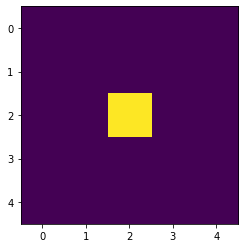

In [100]:
_k = np.ones((5,5))
_k[2,2] = 2
plt.imshow(_k)

In [101]:
from scipy.ndimage import convolve
bbb=convolve(np.clip(aaa.astype(float),0,1), _k, mode='constant', cval=0.0)

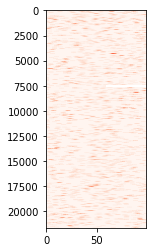

In [103]:
plt.imshow(bbb,aspect=0.01,cmap="Reds",vmin=0,vmax=1)

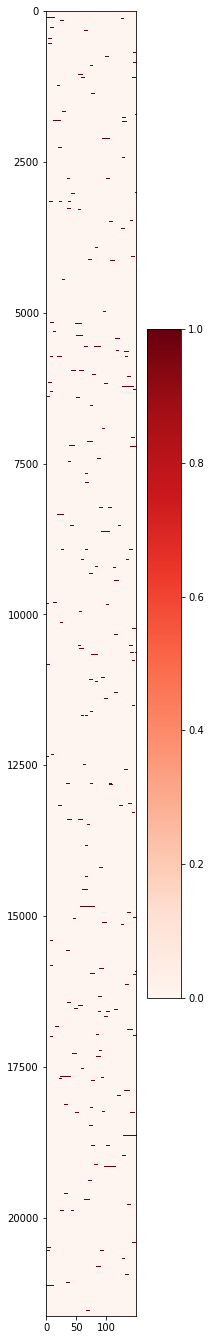

In [119]:
# SpliceDDX55aux.bb
# SpliceCTCFaux.bb
aaa = rstacks(
    "SpliceCTCFaux.bb",
    dfs["ctcf"],
    flank=15_000,
    binsize=200
)[reordered_jdxs["ctcf"]].astype(float)
bbb=convolve(np.clip(aaa.astype(float),0,1), _k, mode='constant', cval=0.0)
plt.figure(figsize=(4,24))
plt.imshow(bbb,aspect=0.1,interpolation="nearest",cmap="Reds",vmin=0,vmax=1)
plt.colorbar()

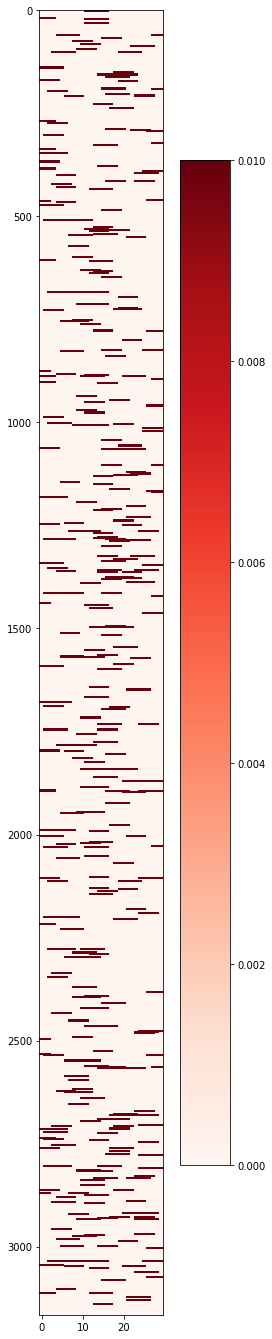

In [116]:
aaa = rstacks(
    "SpliceCTCFaux.bb",
    dfs["ctcf_g4"],
    flank=15_000,
    binsize=1_000
)[reordered_jdxs["ctcf_g4"]]
plt.figure(figsize=(6,24))
bbb=convolve(np.clip(aaa.astype(float),0,1), _k, mode='constant', cval=0.0)
plt.imshow(bbb,aspect=0.1,interpolation="none",cmap="Reds",vmin=0,vmax=.01)
plt.colorbar()

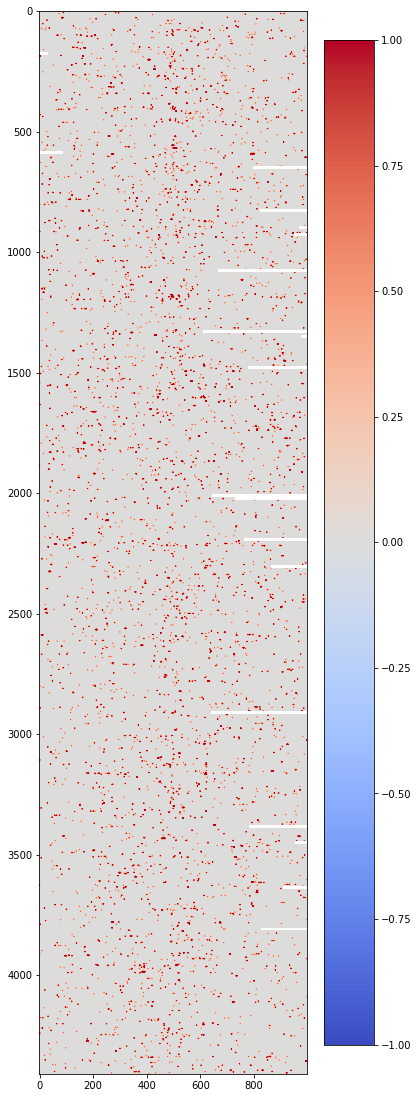

In [129]:
aaa = rstacks(
    "SpliceCTCFaux.bb",
    dfs["g4"],
    flank=250_000,
    binsize=500
)[reordered_jdxs["g4"]]
plt.figure(figsize=(6,42))
bbb=convolve(np.clip(aaa.astype(float),0,1), _k, mode='constant', cval=0.0)
plt.imshow(bbb,aspect=0.9,interpolation="bilinear",cmap="coolwarm",vmin=-1,vmax=1)
plt.colorbar()